# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [2]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
 96% 5.00M/5.21M [00:00<00:00, 50.1MB/s]
100% 5.21M/5.21M [00:00<00:00, 51.6MB/s]
Archive:  parkinglot-occupation.zip
  inflating: ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_01a29d413e3642d39e11414dc6e95501_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_023ee6f9ea20407da126475ef5bfe567_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_03fffe90162c4e06be43e47f34d9e83a_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_04c6ff9e977d4f59bbf963bfb97f6872_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_0571fcbaa9b94ddfaf5c65edad33e59e_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_064a5abf3c7d47f9942f77da2a2af7e7_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_066690ec6e534d9fbe6be7f9acffb48d_empty.jpg  
  inflating: ParkingLot_O

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [36]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.15, # take 15% from training dataseat as validation
                                   rotation_range=20, #adjasing data augmentation that will appear if the model fit. with multiple type of augmentation
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/ParkingLot_Occupation/train',
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    '/content/ParkingLot_Occupation/train',
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary',
    subset='validation')

testing_generator = test_datagen.flow_from_directory(
    '/content/ParkingLot_Occupation/test',
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary')


Found 1175 images belonging to 2 classes.
Found 207 images belonging to 2 classes.
Found 344 images belonging to 2 classes.


In [35]:
testing_generator = test_datagen.flow_from_directory(
    '/content/ParkingLot_Occupation/test/empty',
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary')

Found 0 images belonging to 0 classes.


In [28]:
testing_generator

## Data Splitting
In this section, we will split our dataset into three parts:

* `train` Folder: Training set (85%).
* `train` Folder: Validation set (15%).
* `test` Folder: Test set (100%).

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),# input layer
    MaxPooling2D(2, 2), #convolutional leyer
    Flatten(input_shape=(150, 150, 3)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')# output layer as a number either 0 or 1 because we have two class
])
# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 175232)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      22,429,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,430,849 (85.57 MB)

 Trainable params: 22,430,849 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history=model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'],)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [7]:
earlyStopping=tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=3)

In [8]:
history=model.fit (train_generator, batch_size=16, epochs=20,  validation_data=validation_generator,callbacks=earlyStopping)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 ━━━━━━━━━━━━━━━━━━━━ 22s 233ms/step - accuracy: 0.7397 - loss: 1.3097 - val_accuracy: 0.9275 - val_loss: 0.2083
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 28s 108ms/step - accuracy: 0.9127 - loss: 0.2252 - val_accuracy: 0.8551 - val_loss: 0.3093
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.9241 - loss: 0.2445 - val_accuracy: 0.9372 - val_loss: 0.1642
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.9471 - loss: 0.1616 - val_accuracy: 0.9082 - val_loss: 0.1791
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.9478 - loss: 0.1616 - val_accuracy: 0.9179 - val_loss: 0.1893
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.9520 - loss: 0.1731 - val_accuracy: 0.9517 - val_loss: 0.1471
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.9676 - loss: 0.1110 - val_accuracy: 0.9420 - val_loss: 0.1355
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9431 - loss: 0.1565 - val_accuracy: 0.9565 - val

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [12]:
print(model.evaluate(testing_generator))

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9254 - loss: 0.1813
[0.22238104045391083, 0.9156976938247681]


## Make Predictions
Use the trained model to make predictions on new or unseen parkinglot images.

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [ ]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

In [24]:
pred=model.predict(testing_generator).

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

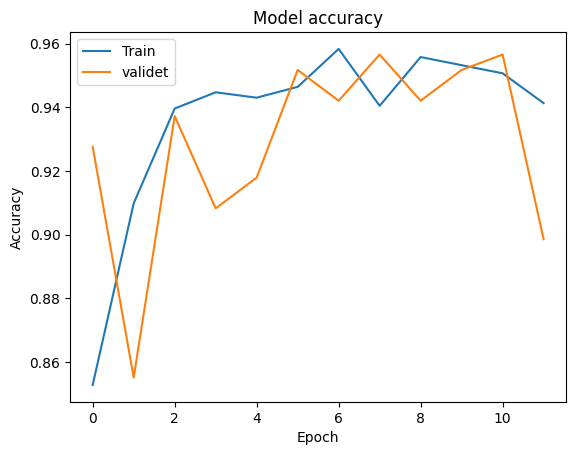

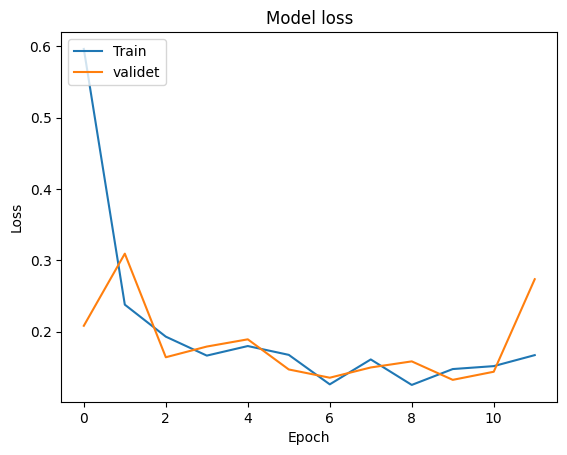

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'validet'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'validet'], loc='upper left')
plt.show()

## Save the Model
Save the trained CNN model for submission.

In [29]:
model_saved='model.h5'
model.save(model_saved)

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying parkinglot?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

> i use data  augmentation because it will increase the cases of training possibility And that will make the testing more accurate

>model architecture depend on the type of target value.

 the input layer depend on the shape of image also every layer:

 the hidden layer on the nature of the image like use max_pooling applying filter on the image and, dropout decrease the processing time after make unactive neuron sleep.   


output layer depend on the target value and in my case i have to class and that make me classify between 0 and 1.



>in training process i use a huge number of epoch and early stopping method to shutdown the training phase if the loss not change and this is also prevent the model from overfitting  


> Loss Function and Metrics that i chose is convent to the binary classification parking problem

> i Visualize the accuracy and loss to see how the model perform in training phase


> if the accuracy of training data is more than validation data this will consider as overfitting and in visualization section we see that it happened a few time